# 1. Load the tips dataset from pydataset

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
from pydataset import data
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [2]:
# load the tips dataset
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


# a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [3]:
# create a column named price_per_person
df['price_per_person'] = df.total_bill / df['size']

In [4]:
# check the new column
df.head()


,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [5]:
# split into train, validate, and test
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)


In [6]:
# encode sex, smoker, day, and time
char = train[train.select_dtypes('object').columns]
dummy_df = pd.get_dummies(char, dummy_na=False, drop_first=True)
dummy_df.head()
num = train.select_dtypes('number')
df_encoded = pd.concat([num, dummy_df], axis=1)

In [7]:
df_encoded

,total_bill,tip,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
19,16.97,3.50,3,5.656667,0,0,0,1,0,0
173,7.25,5.15,2,3.625000,1,1,0,1,0,0
119,12.43,1.80,2,6.215000,0,0,0,0,1,1
29,21.70,4.30,2,10.850000,1,0,1,0,0,0
238,32.83,1.17,2,16.415000,1,1,1,0,0,0
208,38.73,3.00,4,9.682500,1,1,1,0,0,0
184,23.17,6.50,4,5.792500,1,1,0,1,0,0
61,20.29,3.21,2,10.145000,1,1,1,0,0,0
42,17.46,2.54,2,8.730000,1,0,0,1,0,0
161,21.50,3.50,4,5.375000,1,0,0,1,0,0


# B. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?
total_bill

/var/folders/53/yp563cbn3r7g84qqyk6nd4140000gn/T/ipykernel_4112/2900660716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='Blues', annot=True)


<Axes: >

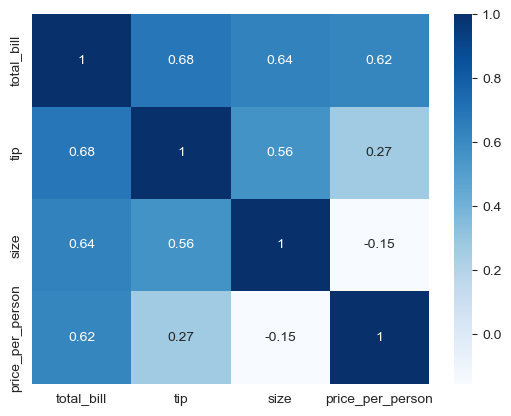

In [8]:
# create a heatmap to see the correlation between the features
sns.heatmap(train.corr(), cmap='Blues', annot=True)

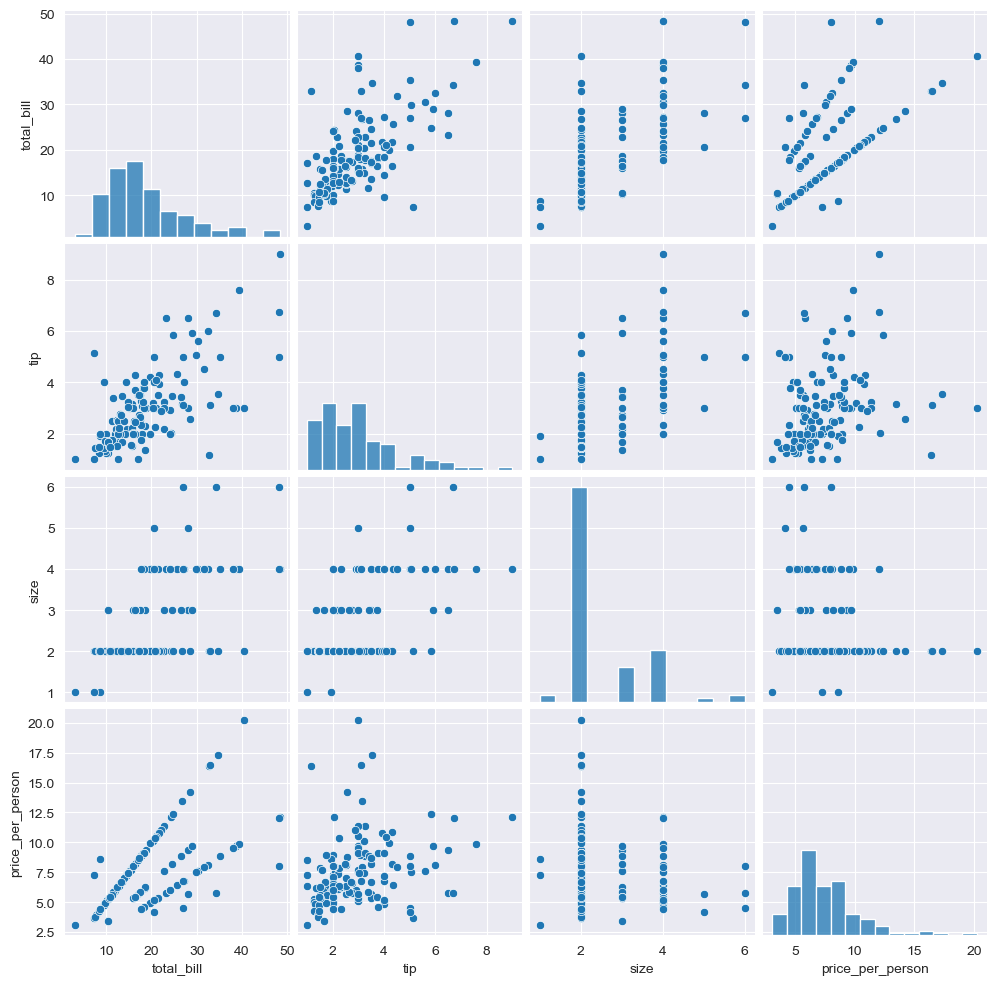

In [9]:
# create a pairplot to see the relationship between the features
sns.pairplot(train)

# C. Use select k best and recursive feature elimination to select the top 2 features for predicting tip amount. What are they?
they are total_bill and size


In [10]:
# scaled the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_encoded)
df_scaled = pd.DataFrame(scaler.transform(df_encoded), columns=df_encoded.columns).set_index([df_encoded.index.values])
df_scaled.head()
# create X and y
X = df_scaled.drop(columns='tip')
y = df_scaled.tip


In [11]:
# create the object
kbest = SelectKBest(f_regression, k=2)


In [12]:
# fit the object
kbest.fit(X, y)


SelectKBest(k=2, score_func=<function f_regression at 0x29cdf4700>)

In [13]:
# use the object
kbest.get_support()


array([ True,  True, False, False, False, False, False, False, False])

In [14]:
# create a dataframe with the selected features
X.columns[kbest.get_support()]



Index(['total_bill', 'size'], dtype='object')

# D. Use recursive feature elimination to select the top 2 features for tip amount. What are they?
total_bill and price_per_person

In [15]:
# recursive feature elimination
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X, y)


RFE(estimator=LinearRegression(), n_features_to_select=2)

In [16]:
# use the object
rfe.get_support()
# create a dataframe with the selected features
X.columns[rfe.get_support()]

Index(['total_bill', 'price_per_person'], dtype='object')

# E. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?
k best adn recursive feature elimination might give different answers for the top features because they use different methods to select the features. This does not change as you change the number of features you are selecting.

# 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [17]:
# create a function
def select_kbest(X, y, k):
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    return X.columns[kbest.get_support()]

In [18]:
# use the function
select_kbest(X, y, 2)

Index(['total_bill', 'size'], dtype='object')

# 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [19]:
# create a function
def rfe(X, y, k):
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X, y)
    return X.columns[rfe.get_support()]

In [20]:
# use the function
rfe(X, y, 2)


Index(['total_bill', 'price_per_person'], dtype='object')

# 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using select k best and recursive feature elimination (use the functions you just built to help you out).


In [21]:
# load the swiss dataset
df = data('swiss')
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [22]:
df.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [23]:
# split into train, validate, and test
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)


In [24]:
# scaled the data
scaler = StandardScaler()
scaler.fit(train)
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns).set_index([train.index.values])
train_scaled.head()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Rive Droite,0.000000,0.474390,0.40625,0.903226,0.492786,0.316327
Aubonne,0.464435,0.729268,0.34375,0.193548,0.000000,0.408163
Rolle,0.330544,0.647561,0.40625,0.290323,0.055766,0.122449
Lavaux,0.426778,0.796341,0.50000,0.258065,0.005832,0.500000
Nyone,0.248954,0.526829,0.59375,0.354839,0.131689,0.163265


In [25]:
# top 3 features using select k best
X = train_scaled.drop(columns='Fertility')
y = train_scaled.Fertility
select_kbest(X, y, 3)

Index(['Examination', 'Catholic', 'Infant.Mortality'], dtype='object')

In [26]:
# top 3 features using recursive feature elimination
rfe(X, y, 3)


Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')